In [1]:
#we will do wine dataset visualisation using pca

In [2]:
#lets import everything
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

In [6]:
df = load_wine()
X = pd.DataFrame(df.data,columns =df.feature_names)
y = pd.Series(df.target, name = 'target')

## Standardiding the results using standard scaler
Why we have used standard scaler: because PCA is a variance based method and feature with larger scales can dominate the results. Standardising puts all features on the same scale, which ensures each one contributes fairly.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Applying pca

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [18]:
#now we will create the dataset for visualisation

pca_df = pd.DataFrame(X_pca , columns = ['PC1','PC2'])
pca_df['target'] = y

#DataVisualisation

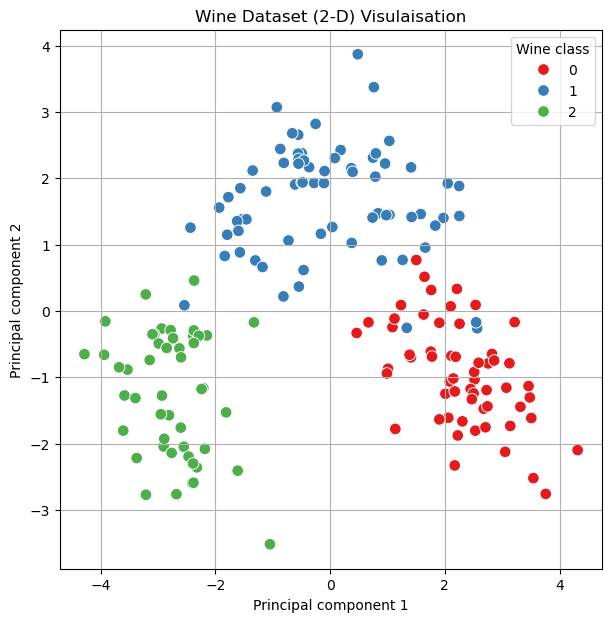

In [19]:
#Sactterplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,7))
sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2',hue = 'target', palette = 'Set1', s = 70 )
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Wine Dataset (2-D) Visulaisation")
plt.legend(title = 'Wine class')
plt.grid(True)
plt.show()

In [20]:
#visualisation is done now we will see explained variance of pca

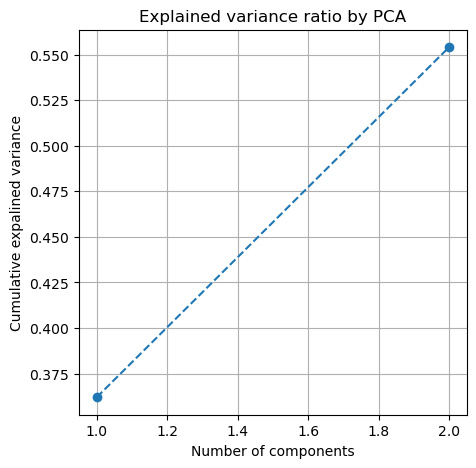

In [21]:
pca_full = pca.fit(X_scaled)
plt.figure(figsize = (5,5))
plt.plot(range(1,len(pca_full.explained_variance_ratio_)+1),pca_full.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--' )
plt.title("Explained variance ratio by PCA")
plt.xlabel("Number of components")
plt.ylabel("Cumulative expalined variance")
plt.grid(True)
plt.show()

In [28]:
pca_full1 = PCA().fit(X_scaled)

In [29]:
cumulative_variance = pca_full1.explained_variance_ratio_.cumsum()

lets see how many components are needed to explain 95% variance

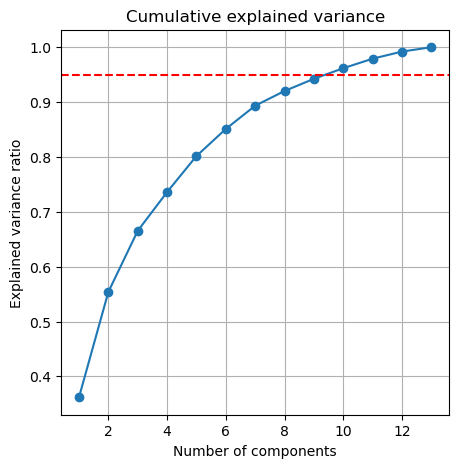

In [31]:
plt.figure(figsize = (5,5))
plt.plot(range(1,len(cumulative_variance)+1), cumulative_variance , marker = 'o')
plt.axhline( y = 0.95,color = 'red', linestyle = '--')
plt.title("Cumulative explained variance")
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.grid(True)
plt.show()